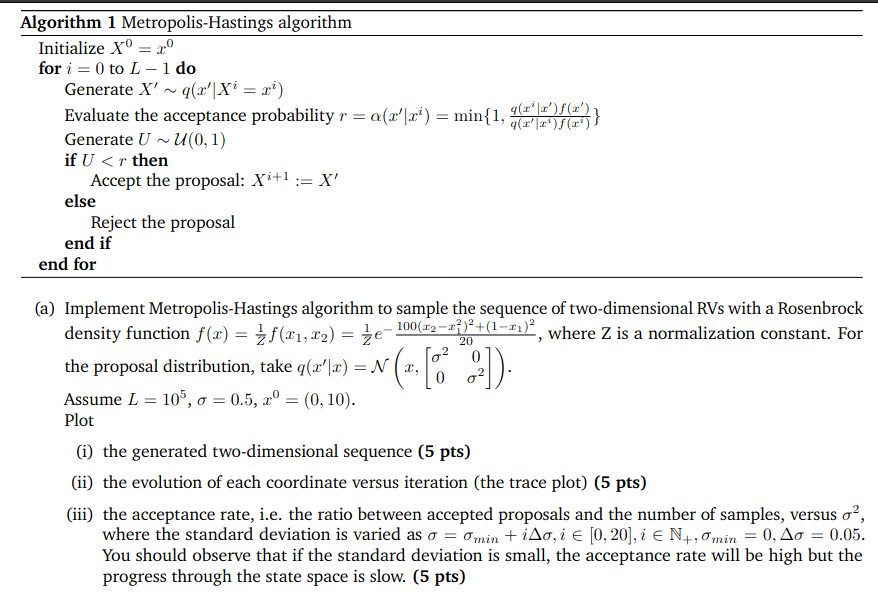

In [131]:
import numpy as np
import matplotlib.pyplot as plt

## Auxiliary Functions

Can be skipped. Check next section "Metropolis-Hastings Implementation".

This section was used to implement some auxiliary functions and plot some intermediate results.

In [132]:
def sample_xl(x, sigma):
    # return np.random.multivariate_normal(x, Sigma)
    # We've realized that the above line is really slow, so we use a faster implementation
    # that is sufficient here because only the diagonal of Sigma is non-zero.

    return np.random.normal(x, sigma, size=x.shape)


Now, we implemented the q function (that we've not used in Metropolis-Hastings, but it was useful to understand some concepts)

In [133]:
def q(x, y, Sigma):
    n = len(x)
    Sigma_inv = np.linalg.inv(Sigma)
    delta = x - y
    norm_const = (2 * np.pi) ** (-n / 2) * np.linalg.det(Sigma) ** (-0.5)
    exponent = -0.5 * delta @ Sigma_inv @ delta
    return norm_const * np.exp(exponent)


<>:22: SyntaxWarning: invalid escape sequence '\S'
<>:22: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipykernel_20371/4016431545.py:22: SyntaxWarning: invalid escape sequence '\S'
  ax.set_title('2D Gaussian PDF: $q([x_1, x_2], [0, 0], \Sigma)$', fontsize=16, pad=20)


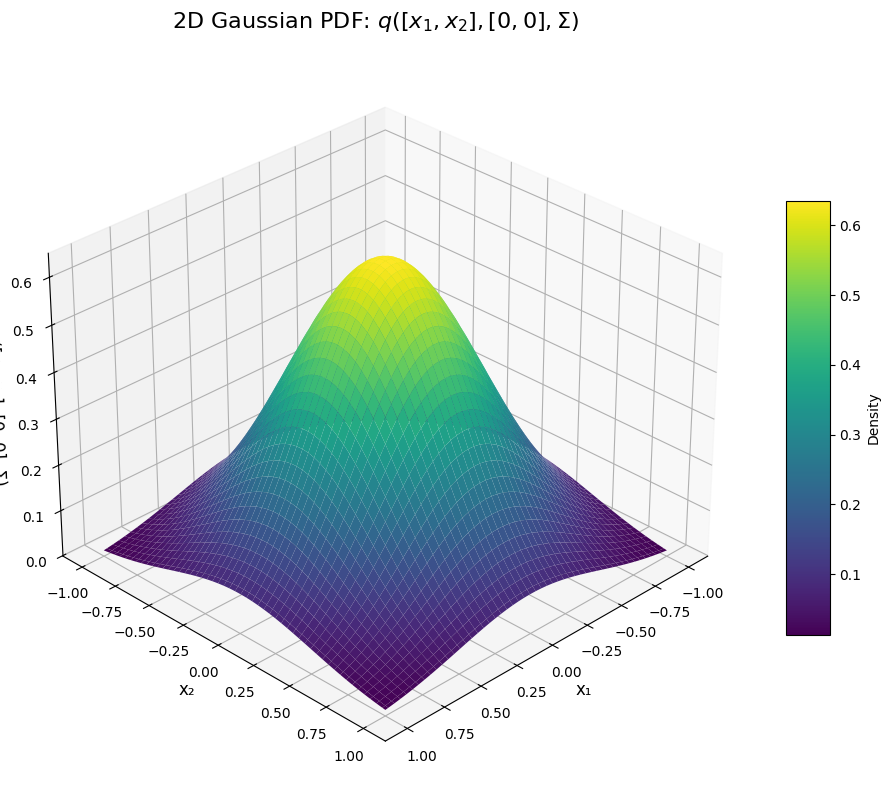

In [134]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

Sigma = [[0.25, 0], [0, 0.25]]

X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        point = np.array([X[i, j], Y[i, j]])
        Z[i, j] = q(point, [0, 0], Sigma)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

ax.set_xlabel('x₁', fontsize=12)
ax.set_ylabel('x₂', fontsize=12)
ax.set_zlabel('q([x₁, x₂], [0, 0], Σ)', fontsize=12)
ax.set_title('2D Gaussian PDF: $q([x_1, x_2], [0, 0], \Sigma)$', fontsize=16, pad=20)
fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10, label='Density')

ax.view_init(elev=30, azim=45)
plt.tight_layout()
plt.show()


As expected, the output of the function q is a 2D-Gaussian curve

In [135]:
def f(x):
    x1 = x[0]
    x2 = x[1]

    return np.exp(-((100) * ((x2 - x1*x1)*(x2 - x1*x1)) + (1 - x1)*(1 - x1))/20)

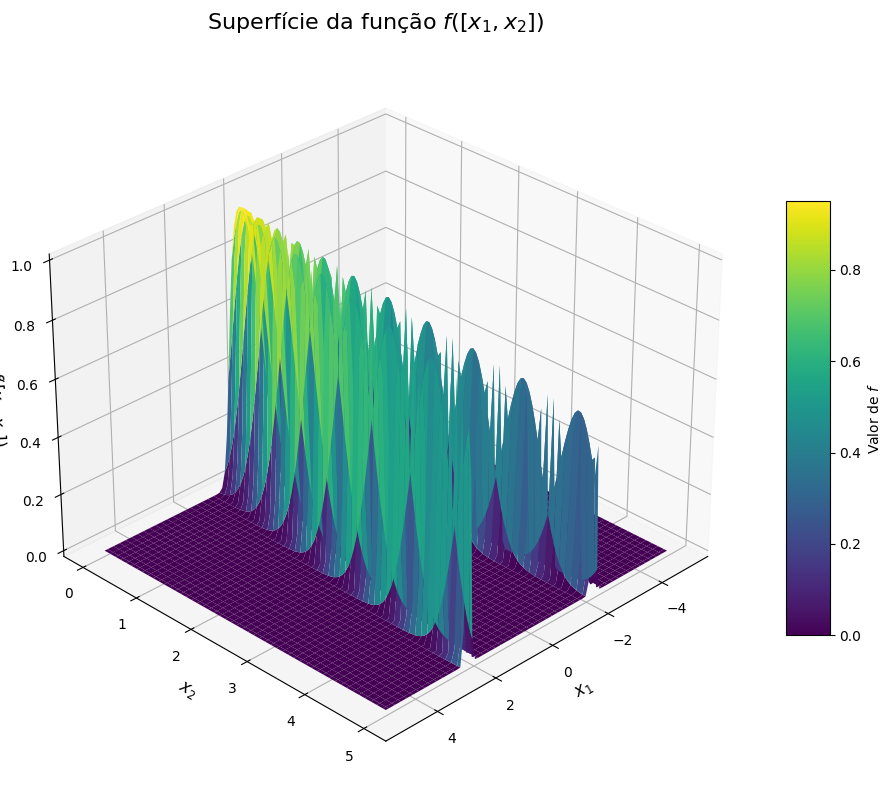

In [136]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-0, 5, 100)
X, Y = np.meshgrid(x, y)

Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        point = np.array([X[i, j], Y[i, j]])
        Z[i, j] = f(point)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Superfície
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)
ax.set_zlabel('$f([x_1, x_2])$', fontsize=12)
ax.set_title('Superfície da função $f([x_1, x_2])$', fontsize=16, pad=20)

fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10, label='Valor de $f$')

ax.view_init(elev=30, azim=45)
plt.tight_layout()
plt.show()
plt.show()
        

We can observe that the regions with higher values in the pdf are the points around y = x²

In [137]:
def alpha(x, xl):
    # return min(1, (q(x, xl, Sigma) * f(xl))/(q(xl, x, Sigma) * f(x)))
    # q in this case is the Gaussian distribution
    # We can simplify this to:
    return min(1,  f(xl) /  f(x))

## Metropolis-Hastings Implementation

In [138]:
def metropolis_hastings(L=10000, sigma=0.5):
    X = np.zeros(shape=(L+1, 2)) # Each line is a 2D Coordinate
    X[0] = [0, 10]

    num_of_acceptances = 0
    for i in range(L):
        xl = sample_xl(X[i], sigma)

        r = alpha(X[i], xl)
        u = np.random.uniform(0, 1)

        if (u <= r):
            num_of_acceptances += 1
            X[i+1] = xl
        else:
            X[i+1] = X[i]

    acc_ratio = num_of_acceptances/L
    return X, acc_ratio

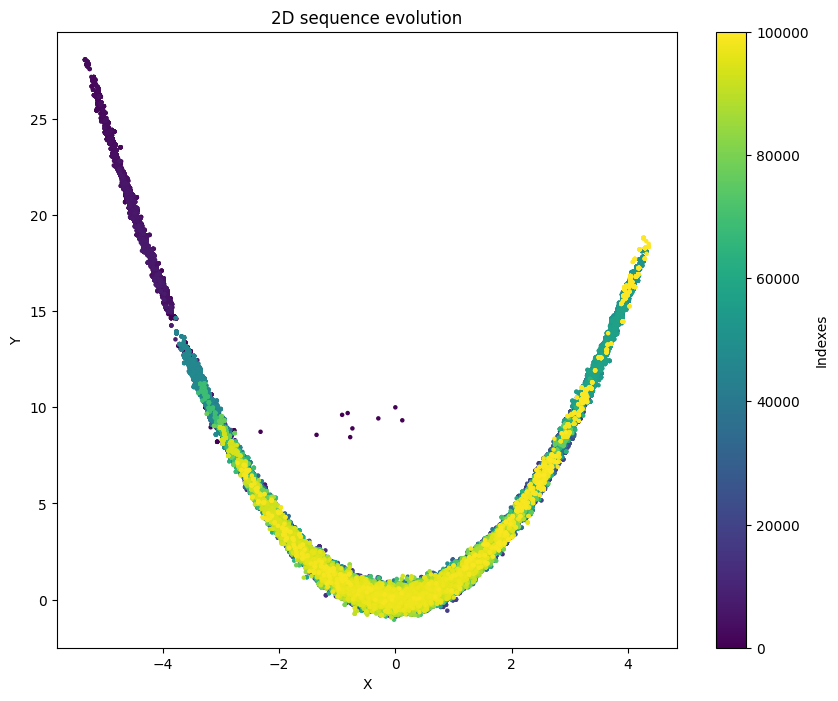

In [139]:
L=100000

X, acc = metropolis_hastings(L=L)
# %prun metropolis_hastings(L=L)

indexes = np.arange(L+1)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=indexes, cmap='viridis', s=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D sequence evolution')

plt.colorbar(scatter, label='Indexes')


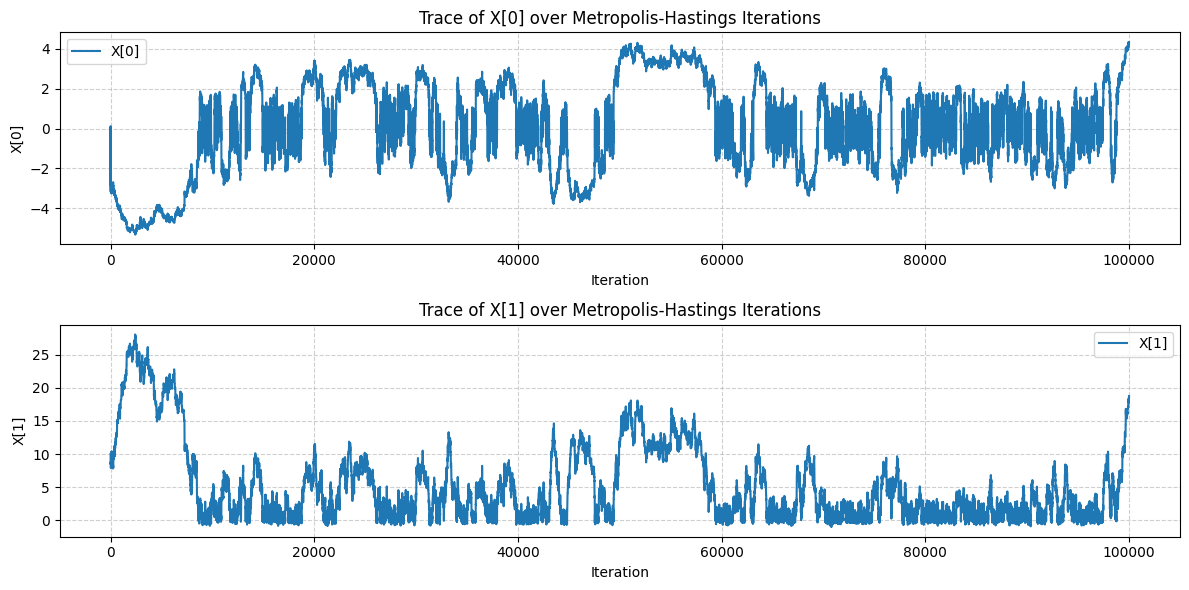

In [140]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(X[:, 0], label='X[0]')
plt.xlabel('Iteration')
plt.ylabel('X[0]')
plt.title('Trace of X[0] over Metropolis-Hastings Iterations')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(X[:, 1], label='X[1]')
plt.xlabel('Iteration')
plt.ylabel('X[1]')
plt.title('Trace of X[1] over Metropolis-Hastings Iterations')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()


[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.  ]
sigma: 0.05, acc: 0.8698
sigma: 0.10, acc: 0.5976
sigma: 0.15, acc: 0.6056
sigma: 0.20, acc: 0.5399
sigma: 0.25, acc: 0.3119
sigma: 0.30, acc: 0.4321
sigma: 0.35, acc: 0.3784
sigma: 0.40, acc: 0.3100
sigma: 0.45, acc: 0.3116
sigma: 0.50, acc: 0.2586
sigma: 0.55, acc: 0.2481
sigma: 0.60, acc: 0.2178
sigma: 0.65, acc: 0.2370
sigma: 0.70, acc: 0.1767
sigma: 0.75, acc: 0.1364
sigma: 0.80, acc: 0.1383
sigma: 0.85, acc: 0.1704
sigma: 0.90, acc: 0.1456
sigma: 0.95, acc: 0.1288
sigma: 1.00, acc: 0.1288



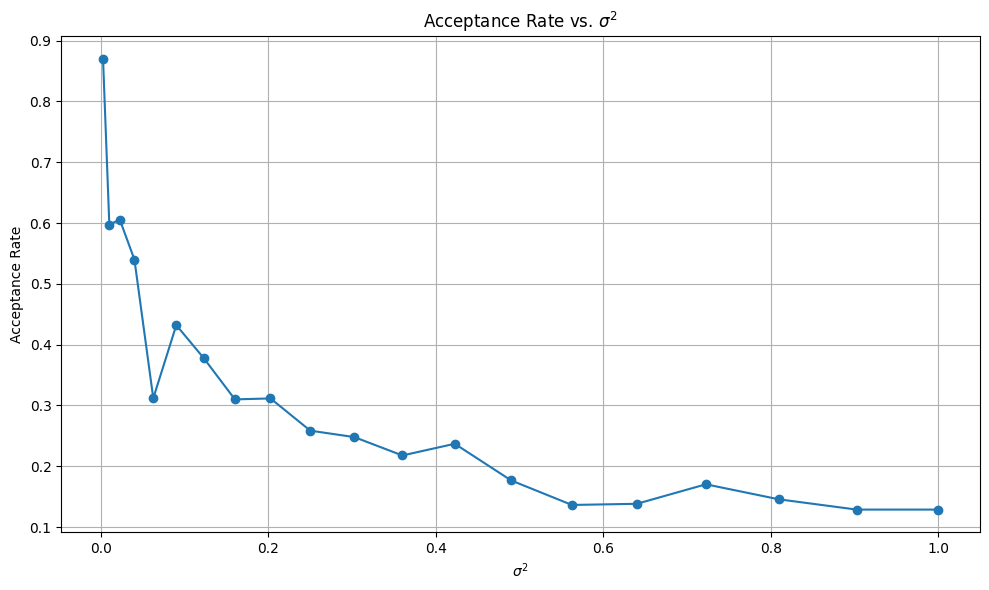

In [142]:
# This cell requires like 1 minute to run with L=100000

sigmas = np.linspace(0.05, 1, 20)
print(sigmas)

acc_ratios = []

for sigma in sigmas:
    _, acc = metropolis_hastings(L=100000, sigma=sigma)
    acc_ratios.append(acc)

    print(f"sigma: {sigma:.2f}, acc: {acc:.4f}")

print()
plt.figure(figsize=(10, 6))
plt.plot(sigmas**2, acc_ratios, marker='o', linestyle='-')
plt.title(r'Acceptance Rate vs. $\sigma^2$')
plt.xlabel(r'$\sigma^2$')
plt.ylabel('Acceptance Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

# 1 B

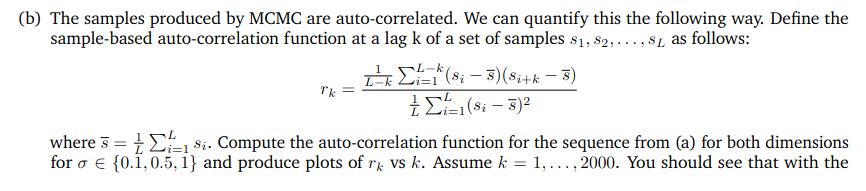

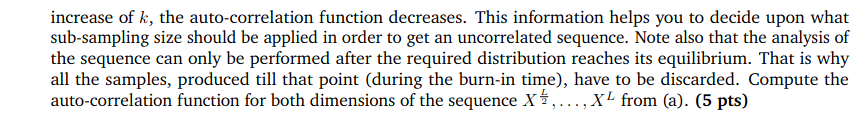

In [143]:
def rk(s, k):
    mean_s = np.mean(s)
    normalized_s = s - mean_s
    L = len(s)
    denominator = np.mean(normalized_s ** 2)

    numerator = np.mean((normalized_s[:L - k]) * (normalized_s[k:]))
    return numerator / denominator

<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_20371/1773220291.py:28: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'Autocorrelation $r_k$ for $x_1$ ($\sigma={sigma}$)')
/tmp/ipykernel_20371/1773220291.py:39: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'Autocorrelation $r_k$ for $x_2$ $\sigma$ ={sigma}')


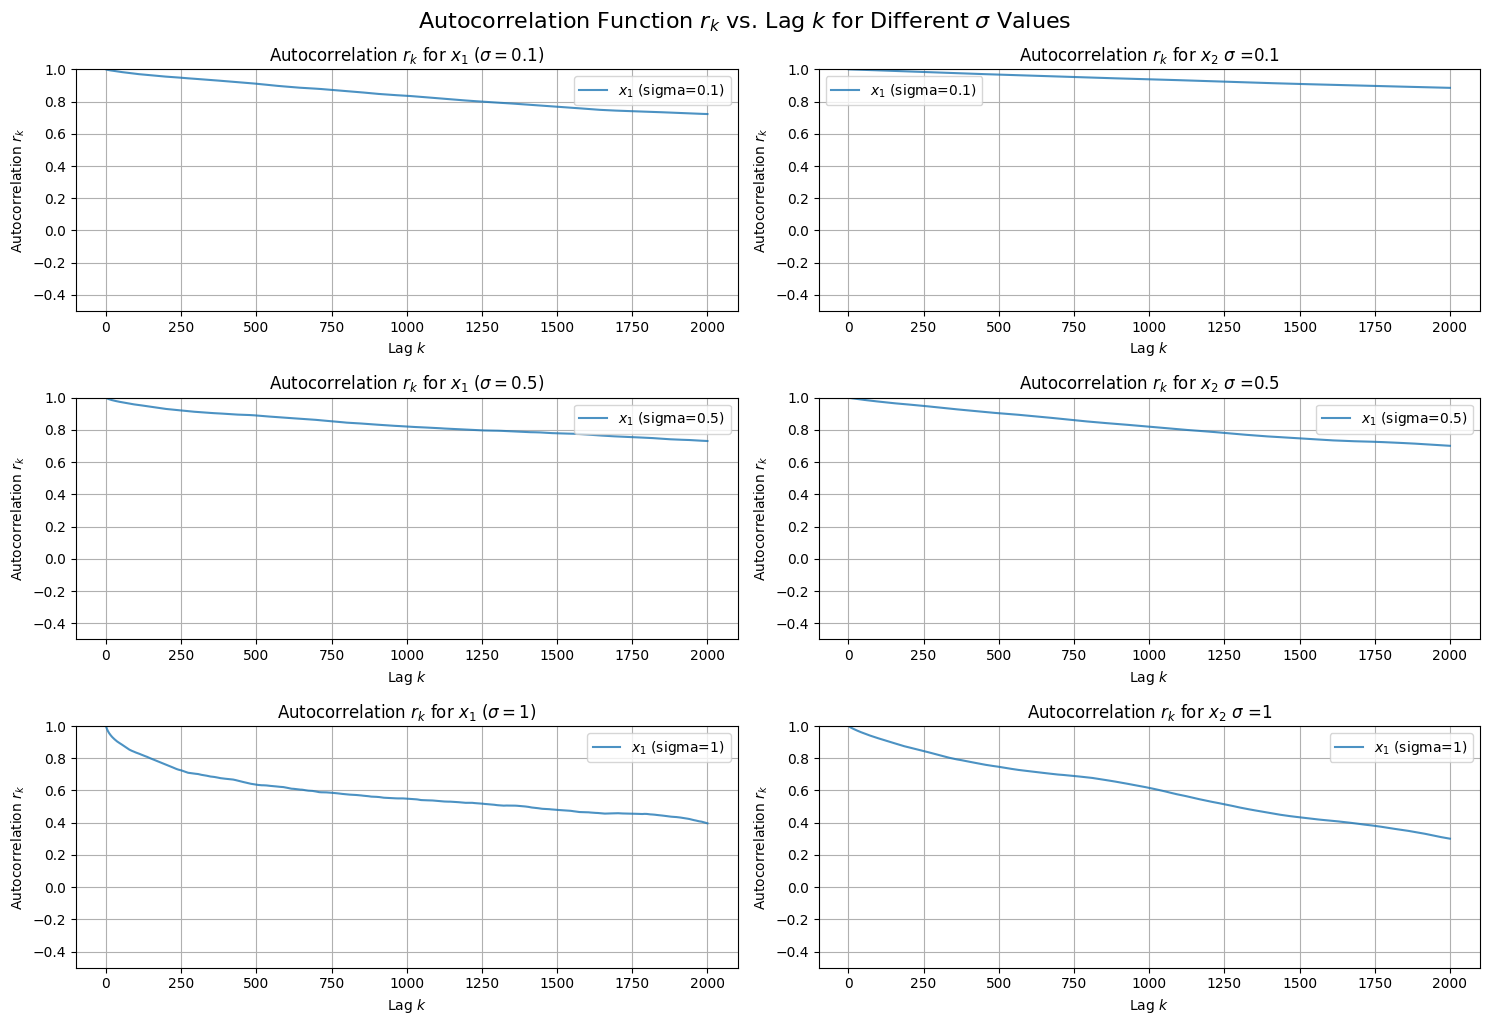

In [151]:
sigmas = [0.1, 0.5, 1]
desired_lags = np.arange(1,2000 + 1)

x_corr = np.zeros_like(desired_lags)
y_corr = np.zeros_like(desired_lags)

L = 100000

plt.figure(figsize=(15, 10))
plot_idx = 1

for sigma in sigmas:
    X,_ = metropolis_hastings(L=L, sigma=sigma)
    
    X = X[L//2:, :]  # cut first L/2 lines

    x = X[:, 0]
    y = X[:, 1]

    x_corr = [rk(x, k) for k in desired_lags]
    y_corr = [rk(y, k) for k in desired_lags]
    # Convert to dB scale?
    # x_corr_db = 10 * np.log10(np.abs(x_corr))
    # y_corr_db = 10 * np.log10(np.abs(y_corr))

    plt.subplot(len(sigmas), 2, plot_idx)
    plt.plot(desired_lags, x_corr, label=f'$x_1$ (sigma={sigma})', alpha=0.8)
    plt.title(f'Autocorrelation $r_k$ for $x_1$ ($\sigma={sigma}$)')
    plt.xlabel('Lag $k$')
    plt.ylabel('Autocorrelation $r_k$')
    plt.grid(True)
    plt.ylim(-0.5, 1.0) # Set consistent y-limits for comparison
    plt.legend()

    plot_idx += 1

    plt.subplot(len(sigmas), 2, plot_idx)
    plt.plot(desired_lags, y_corr, label=f'$x_1$ (sigma={sigma})', alpha=0.8)
    plt.title(f'Autocorrelation $r_k$ for $x_2$ $\sigma$ ={sigma}')
    plt.xlabel('Lag $k$')
    plt.ylabel('Autocorrelation $r_k$')
    plt.grid(True)
    plt.ylim(-0.5, 1.0) # Set consistent y-limits for comparison
    plt.legend()

    plot_idx += 1

plt.tight_layout()
plt.suptitle(r'Autocorrelation Function $r_k$ vs. Lag $k$ for Different $\sigma$ Values', y=1.02, fontsize=16)
plt.show()


